In [76]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

In [29]:
df = pd.read_csv('all_data.csv')

# lets rename Life expectancy at birth (years)
df.rename(columns= {'Life expectancy at birth (years)' : 'life_exp'}, inplace=True)
df.head()

,Country,Year,life_exp,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   96 non-null     object 
 1   Year      96 non-null     int64  
 2   life_exp  96 non-null     float64
 3   GDP       96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Can see there is no missing data in the dataset and the data types are correctly loaded

In [36]:
# number of unique countries
print(f'There are {df.Country.nunique()} countries in the dataset')

df.Country.unique().tolist()

There are 6 countries in the dataset


['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

In [38]:
# range of years
print(f'Range of {df.Year.nunique()} years')

df.Year.min(), df.Year.max()

Range of 16 years


(2000, 2015)

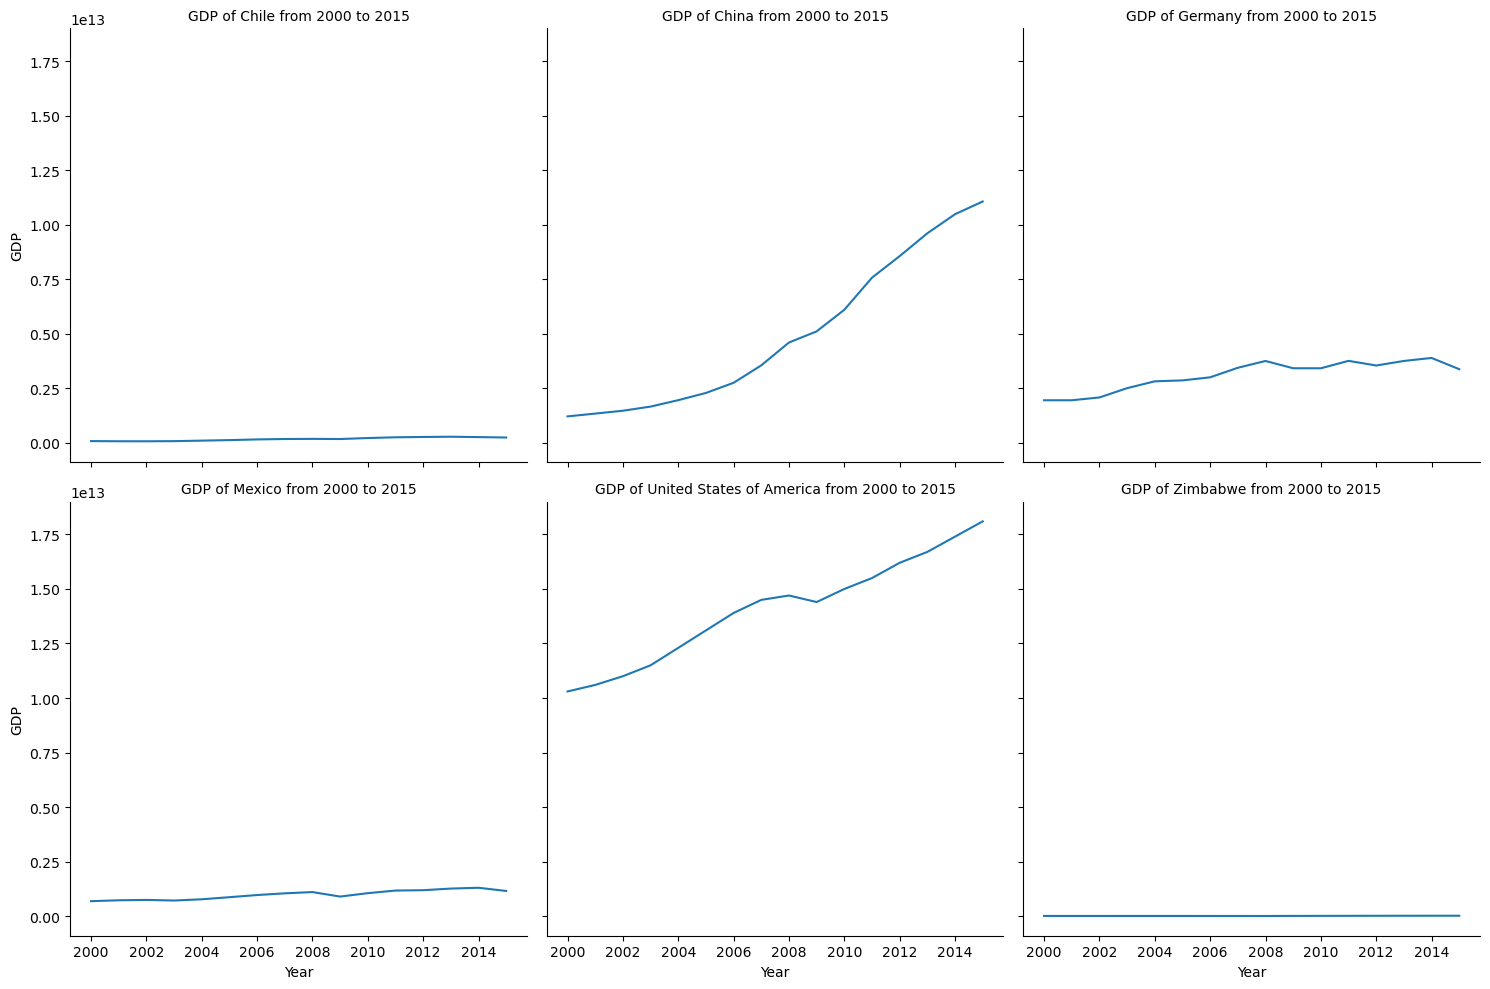

In [54]:
# Lets get an idea of how the GDP has increased for each country over time
g = sns.relplot(x = 'Year', y = 'GDP', data = df, kind = 'line', col = 'Country', col_wrap = 3)

g.set_titles(col_template= 'GDP of {col_name} from 2000 to 2015')
g.fig.tight_layout()

plt.show()

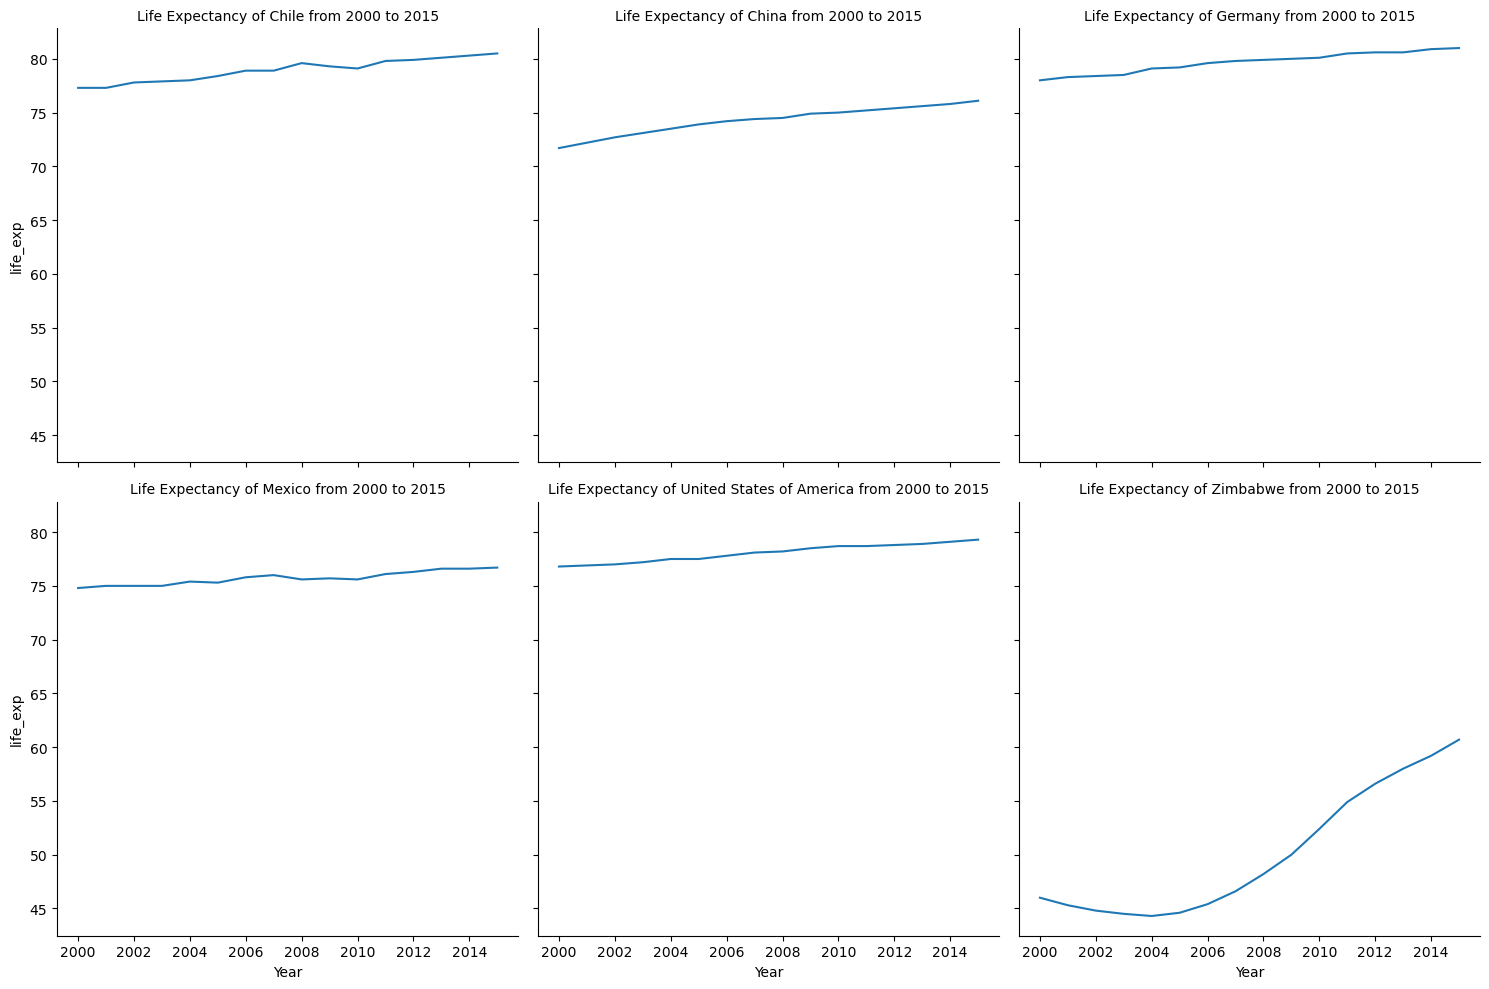

In [56]:
# Lets get an idea of how the Life Expectancy has increased for each country over time
g = sns.relplot(x = 'Year', y = 'life_exp', data = df, kind = 'line', col = 'Country', col_wrap = 3)

g.set_titles(col_template= 'Life Expectancy of {col_name} from 2000 to 2015')
g.fig.tight_layout()

plt.show()

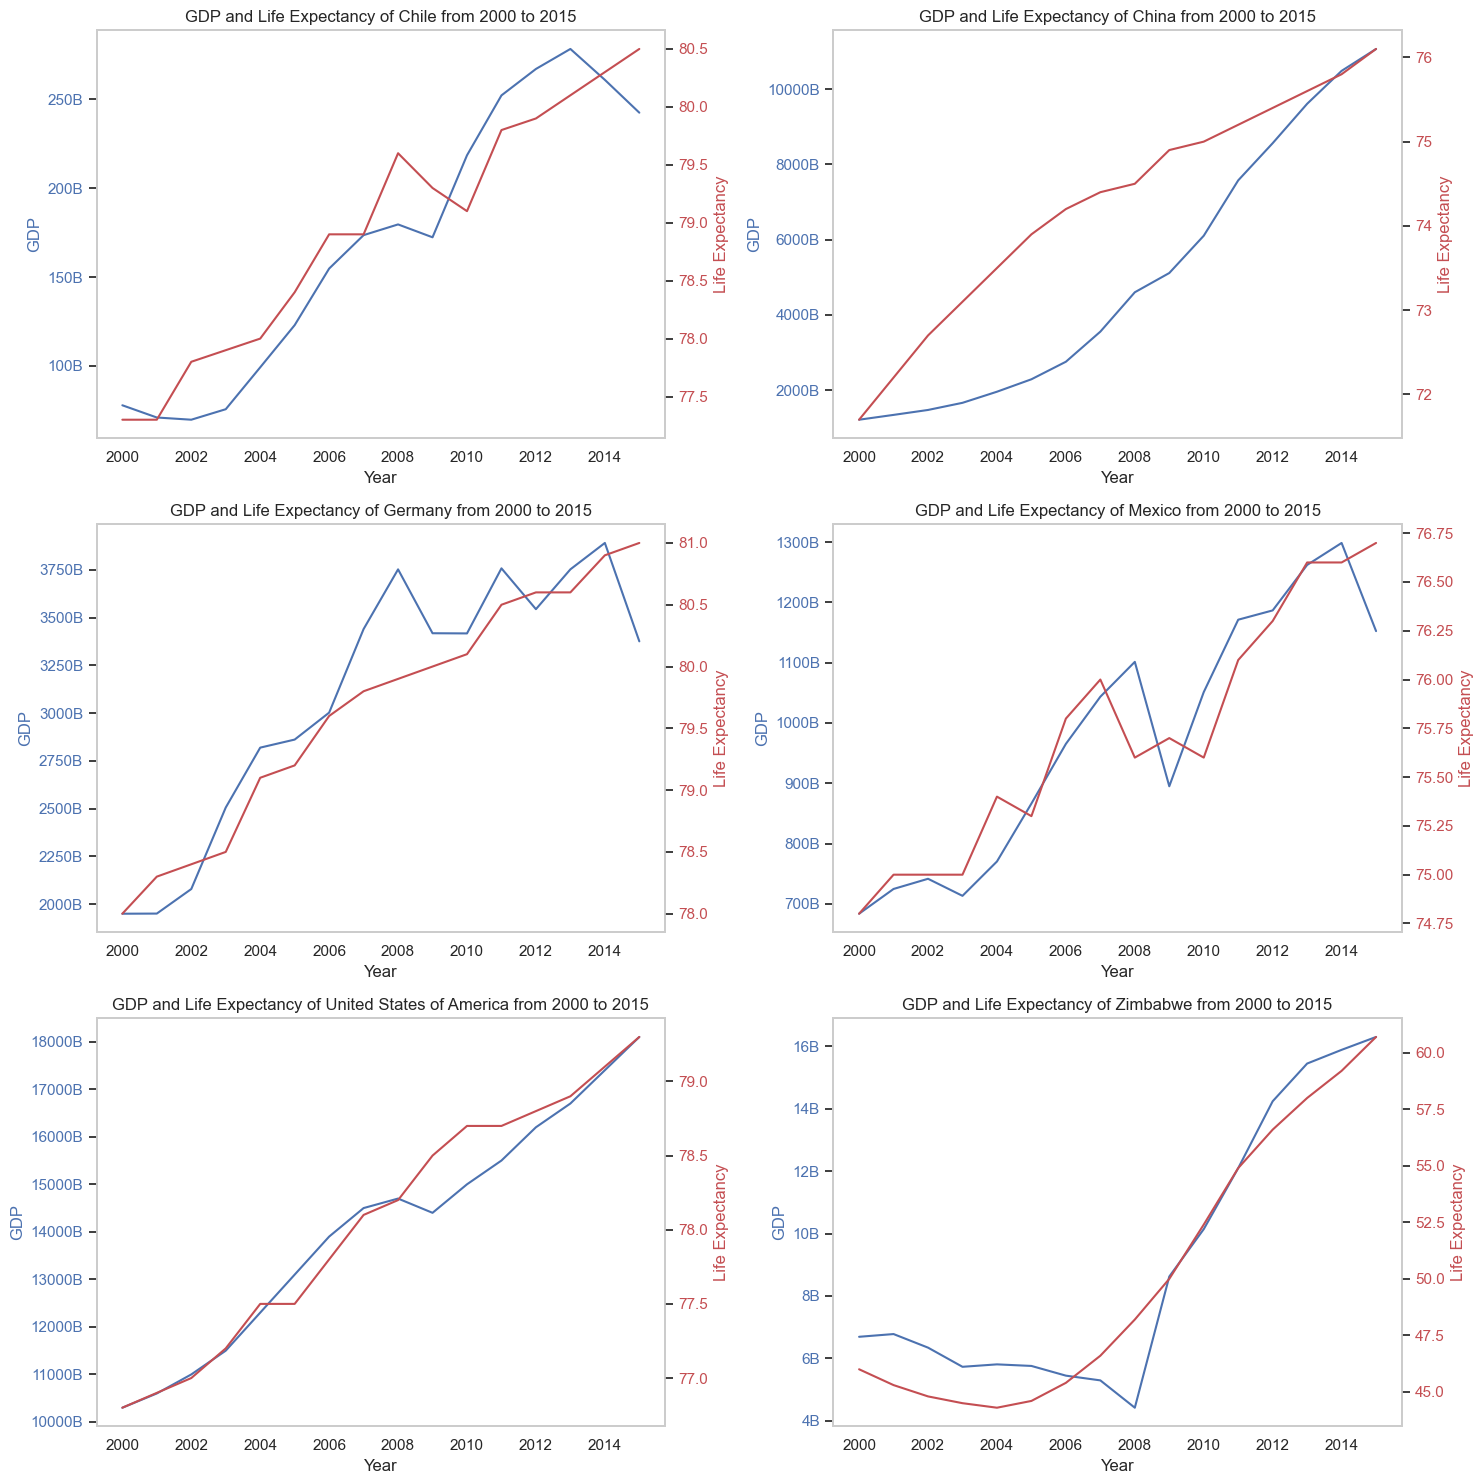

In [94]:
# Set up the plot
sns.set(style="whitegrid")

unique_countries = df['Country'].unique()
num_countries = len(unique_countries)

# number of rows and columns
num_cols = 2
num_rows = 3

# Create a subplot for each country in a grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the array to easily iterate over it

def billions_formatter(x, pos):
    """The two args are the value and tick position."""
    return '%1.0fB' % (x * 1e-9)

for ax, country in zip(axes, unique_countries):
    # isolate for the country
    country_data = df[df['Country'] == country]

    # Plot GDP
    ax.plot(country_data['Year'], country_data['GDP'], color='b', label='GDP')
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP', color='b')
    ax.tick_params(axis='y', labelcolor='b')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(billions_formatter))  # Apply custom formatter

    # Create a second y-axis to plot life expectancy
    ax2 = ax.twinx()
    ax2.plot(country_data['Year'], country_data['life_exp'], color='r', label='Life Expectancy')
    ax2.set_ylabel('Life Expectancy', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    # turn off the gridlines
    ax.grid(False)
    ax2.grid(False)
    
    # set the title
    ax.set_title(f'GDP and Life Expectancy of {country} from 2000 to 2015')

fig.tight_layout()
plt.show()

We can seee China and the USA GDPs have increased the most (biggest slopes) out of the 6 countries over the past 15 years.

Countries like Zimbabw, Chile, and Mexico have had a flat increased (slope close to 0)

Germany had a slightly increasing gdp (low slope) around 2000 to 2006 then become stagnant and in some periods of time, negative.

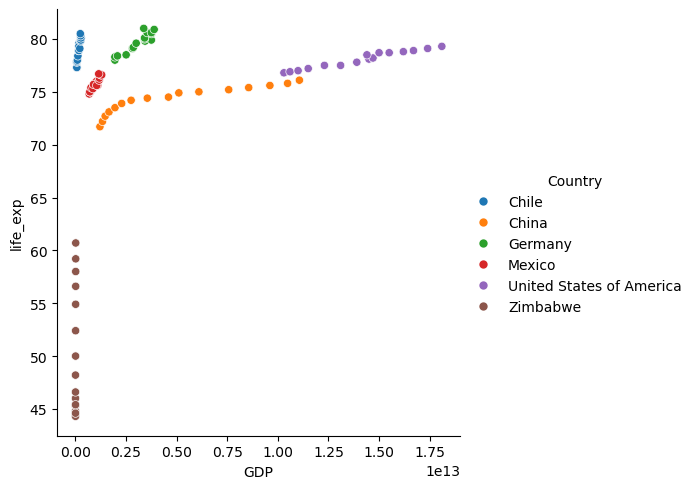

In [50]:
# lets look at the relationship between GDP and Life Expectancy

sns.relplot(x = 'GDP', y = 'life_exp', kind = 'scatter', hue = 'Country', data = df)

plt.show()

For Chile and Zimbabwe, there appears to be no correlation/association between GDP and Life Expectancy. For coutnries such as Germany and Mexico, there appears to be a strong linear positive correlation. For the other countries there appears to be a weak postiive association.

<Figure size 1500x600 with 0 Axes>

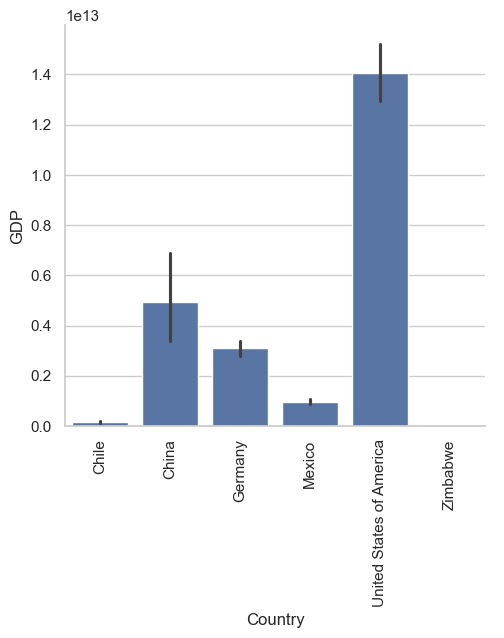

In [105]:
# lets see the differences in gdp per country

plt.figure(figsize=(15, 6))
sns.catplot(x = 'Country', y = 'GDP', data = df, kind = 'bar')
plt.xticks(rotation = 90)

plt.show()